# Лабораторная работа 4

# Правильный многоугольник Рело. Векторизация вычислений в `numpy`

Билина Вероника, 01.04.2025

# Задание 4.1. Построение треугольника Рело

# Выполнение задания 4.1.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import math

Определим переменные

In [26]:
n = 3 # количество вершин треугольника Рело
center = np.array([0,0]) # координаты центра треугольника Рело
r = 10. # ширина треугольника Рело
N = 100 # количество точек для описания одной стороны треугольника Рело

## Этап 1. Вычисление координат вершин правильного треугольника

Вершины правильного многоугольника расположены на окружности, описанной вокруг многоугольника. Радиус $R$ окружности, описанной вокруг правильного *n*-угольника с длиной стороны , вычисляется по формуле</br>
$$R=\frac{l}{2sin\pi/n} $$
Длина стороны *l* правильного треугольника, на котором будем строить треугольник Рело, совпадает с шириной треугольника Рело r.

In [27]:
l = r # !!! равенство справедливо только для треугольника Рело

In [28]:
R = l/(2*np.sin(np.pi/n))

Зафиксируем прямоугольную декартову систему координат. Центр треугольника размещаем в точке `center` . Построим матрицу `vertices` с координатами вершин правильного треугольника, используя параметрическое описание точек описанной окружности по формуле $x(t)=x_{\text{0}}+Rcos(t), y(t)=y_{\text{0}}+Rsin(t) $, для значений $t \in {0,2\pi/3,4\pi/3} $.

In [29]:
t = np.arange(0,2*np.pi,2*np.pi/n)
vertices = center + R*np.transpose([np.cos(t), np.sin(t)])
vertices

array([[ 5.77350269,  0.        ],
       [-2.88675135,  5.        ],
       [-2.88675135, -5.        ]])

In [30]:
vertices[0,0], vertices[0,:], vertices[:,1]

(np.float64(5.773502691896258),
 array([5.77350269, 0.        ]),
 array([ 0.,  5., -5.]))

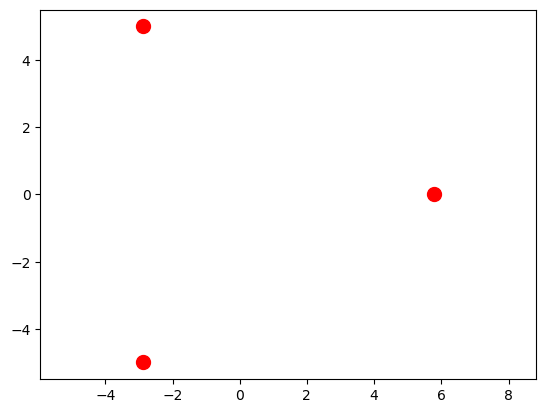

In [31]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.axis('equal');

## Этап 2. Представление одной стороны треугольника Рело.

Обозначим через $a$ центральный угол, соответствующий стороне правильного n-угольника. Тогда
$$ a=2\pi/n$$
Обозначим через $b$ центральный угол, соответствующий стороне правильного многоугольника Рело, когда центр окружности расположен в вершине правильного многоугольника. Тогда $$b=a/2$$


In [32]:
alpha = 2*np.pi/n
beta = alpha/2

In [33]:
angle = np.linspace(-beta/2, beta/2, N)

In [34]:
side0 = vertices[0] + r*np.transpose([np.cos(angle + np.pi),
 np.sin(angle + np.pi)])

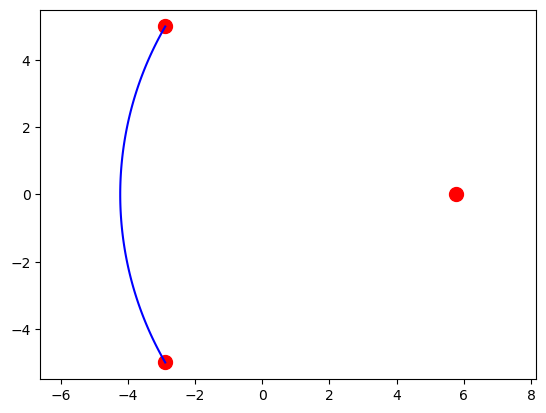

In [35]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.plot(side0[:,0],side0[:,1],'b-',markersize=20)
plt.axis('equal');

In [36]:
side1 = vertices[1] + r*np.transpose([np.cos(angle + np.pi + alpha),
 np.sin(angle + np.pi + alpha)])

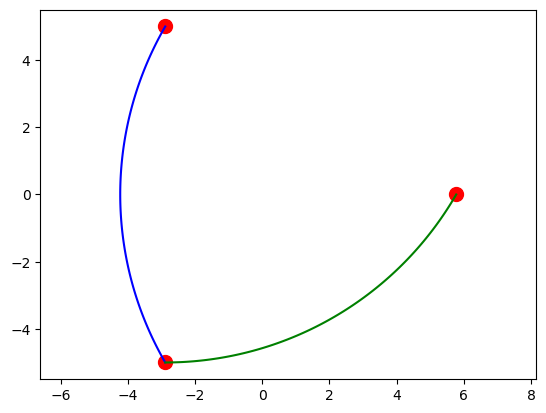

In [37]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.plot(side0[:,0],side0[:,1],'b-',markersize=20)
plt.plot(side1[:,0],side1[:,1],'g-',markersize=20)
plt.axis('equal');

## Этап 3. Моделирование границы треугольника Рело

Создадим СПИСОК из матриц, каждая их которых содержит координаты точек одной из сторон треугольника Рело

In [38]:
list_sides = [vertices[i] +
 r*np.transpose([np.cos(angle + np.pi + i*alpha),
 np.sin(angle + np.pi + i*alpha)])
 for i in range(n)]

С помощью фунции `concatenate` из расширения `numpy` объединим массивы,
созданные для каждой из сторон треугольника Рело, в единый массив `sides`

In [39]:
sides = np.concatenate(list_sides)

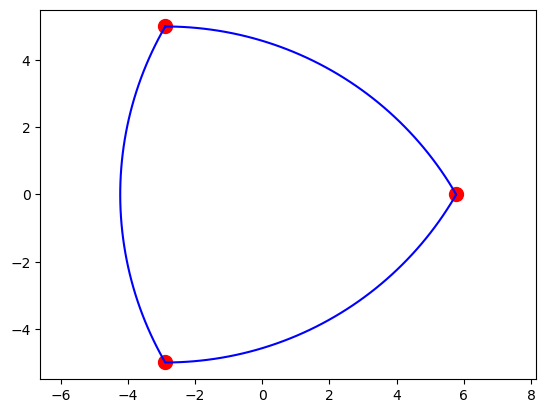

In [40]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.plot(sides[:,0],sides[:,1],'b-',markersize=20)
plt.axis('equal');

## Задание 4.2. Построение правильного многоугольника Рело

`n` - количество вершин многоугольника Рело</br>
`center` - центр многоугольника Рело </br>
`N` - количество точек для опиание одной стороны многоугольника Рело</br> 
`r` - ширина многоугольника Рело</br>

Построим матрицу `verices` с координатами вершин правильного многоугольника

In [41]:
t = np.arange(0,2*np.pi,2*np.pi/n)
vertices = center + R*np.transpose([np.cos(t), np.sin(t)])

Обозначим через $a$ центральный угол, соответсвующий стороне правильного n-угольника

 обозначим через $b$ центральный угол, соответствующий стороне правильного многоугольника Рело, когда центр окружности расположен в вершине правильного многоугольника

In [42]:
alpha = 2*np.pi/n
beta = alpha/2

Создадим СПИСОК из матриц, каждая из которых содержит координаты точек одной из сторон многоугольника Рело

In [43]:
list_sides=[vertices[i] +
 r*np.transpose([np.cos(angle + np.pi + i*alpha),
 np.sin(angle + np.pi + i*alpha)])
 for i in range(n)]

In [44]:
sides=np.concatenate(list_sides)

Чтобы найти радиус описанной окружности правильного многоугольника, используется формула:$$R=\frac{l}{2sin\pi/n} $$
Однако длина стороны `l` нам неизвестна. Радиус окружности `r` согласуется с `l` так, чтобы окружность с радиусом `r`, центр которой находится в вершине многоугольника, проходила через две соседние вершины, противоположные данной.
При этом угол `b` обозначает угол, соответствующий стороне многоугольника, когда его центр находится в вершине. Этот же угол является центральным углом окружности радиусом `r`, с центром в вершине, а противоположная хорда — это длина стороны `l`.
Используя теорему косинусов, можно выразить `l`:
$$l^2=r^2+r^2-2*r*r*\cos(b) $$ Откуда:
$$ l = \sqrt{2*r^2(1-\cos(b))}$$
Этот подход позволяет вычислить длину стороны правильного n-угольника при известном радиусе `r`. Если нужно вывести `R` в окончательном виде, можно подставить `l` в первую формулу!

In [45]:
l=math.sqrt(2*r*r*(1-math.cos(beta)))

In [46]:
R = l/(2*np.sin(np.pi/n))

## Задание 4.3. Результирующая пользовательская функция

In [47]:
def regular_polygon_Relo(n=3, center=np.array([0, 0]), r=1, N=100):
    """
    Создаёт матрицу точек, описывающих границу правильного многоугольника Рело.

    Аргументы:
    n (int): количество вершин правильного многоугольника Рело, является нечетным целым числом большим 2.
    center (np.ndarray): массив координат центра правильного многоугольника Рело.
    r (float): ширина правильного многоугольника Рело, является положительным числом
    N (int): количество точек для описания одной стороны правильного многоугольника Рело; является натуральным числом;

    Возвращает:
    np.ndarray: матрица, каждая строка которой содержит координаты точек, описывающих границу правильного многоугольника Рело.

    """
    assert isinstance(n, int) and n > 2 and n % 2 == 1, "количество вершин n должно быть нечётным целым числом больше 2"
    assert isinstance(center, np.ndarray) and center.shape == (2,), "координаты центра center должны быть массивом из 2 элементов"
    assert isinstance(r, (int, float)) and r > 0, "радиус r должно быть положительным числом"
    assert isinstance(N, int) and N > 0, "количество точек N для описания одной стороны правильного многоугольник должно быть натуральным числом"
    t = np.arange(0,2*np.pi,2*np.pi/n)
    vertices = center + R*np.transpose([np.cos(t), np.sin(t)])
    alpha = 2*np.pi/n
    beta = alpha/2
    angle = np.linspace(-beta/2, beta/2, N)
    list_sides=[vertices[i] + r*np.transpose([np.cos(angle + np.pi + i*alpha), np.sin(angle + np.pi + i*alpha)]) for i in range(n)] 
    sides=np.concatenate(list_sides)
    l=math.sqrt(2*r*r*(1-math.cos(beta)))
    R = l/(2*np.sin(np.pi/n))
    return sides

In [48]:
import relo

## Задание 4.4. Тестирование функции

In [49]:
relo.regular_polygon_Relo(n=2, r=-1)

AssertionError: n должно быть нечётным целым числом больше 2

In [50]:
relo.regular_polygon_Relo(center=[0, 0,-2])

AssertionError: center должен быть массивом из 2 элементов

In [51]:
relo.regular_polygon_Relo(n=-5)

AssertionError: n должно быть нечётным целым числом больше 2

In [52]:
relo.regular_polygon_Relo(N=-5)

AssertionError: N должно быть натуральным числом

In [53]:
relo.regular_polygon_Relo(n=8)

AssertionError: n должно быть нечётным целым числом больше 2

In [54]:
relo.regular_polygon_Relo(r=-1)

AssertionError: r должно быть положительным числом

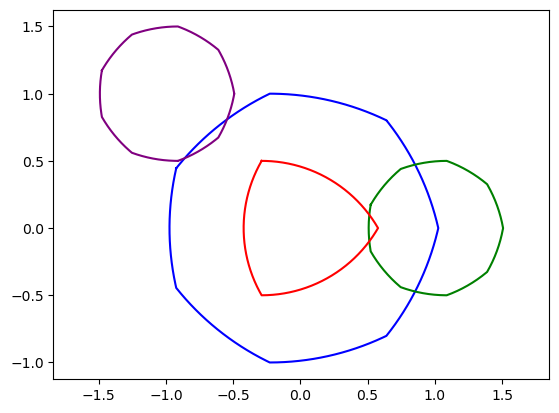

In [56]:
plt.figure()
ax=plt.axes()
sides1 = relo.regular_polygon_Relo(7, np.array([0, 0]), 2, 100)
ax.plot(sides1[:, 0], sides1[:, 1],'b-',markersize=20)
sides2 = relo.regular_polygon_Relo(n=9, center=np.array([-1, 1]), r=1, N=70)
ax.plot(sides2[:, 0], sides2[:, 1],'purple',markersize=20)
sides3 = relo.regular_polygon_Relo(9, np.array([1, 0]), N=50, r=1)
ax.plot(sides3[:, 0], sides3[:, 1],'green',markersize=20)
sides4 = relo.regular_polygon_Relo()
ax.plot(sides4[:, 0], sides4[:, 1],'r-',markersize=20)
plt.axis('equal');